# Initial Look At the Data

We can download data for a particular police authroity from the `data.police.uk` website.

https://data.police.uk/data/

For example, download the data for the Nottinghamshire area for the December 2018 to December 2018 period (i.e. just for December 2018).

From the [homepage](../) of this notebook environment, click on the `Upload` button and upload the zip file you have just downloaded from the data.police.uk website.

In [1]:
#List the files in the current directory - you should see the zip file you uploaded
!ls

 binder
 data
'Initial Look At The Data.ipynb'
 LICENSE
'LSOA Sketches.ipynb'
'Police API Demo.ipynb'
 README.md
'RuralUrbanClassification and Census Classification.ipynb'


In [2]:
#Unzip the zip file
#It should unzip a CSV file into a newly created folder
#My file was called ad3a89c1b0c17604f60d6ac8b5cf86cf6cce0540.zip so that's what I'm using
#If your file is called myfile.zip, then a good bet would be: !unzip myfile.zip

#I've popped a copy of my data in the repo data/ directory
!unzip data/ad3a89c1b0c17604f60d6ac8b5cf86cf6cce0540.zip

Archive:  data/ad3a89c1b0c17604f60d6ac8b5cf86cf6cce0540.zip
  inflating: 2018-12/2018-12-nottinghamshire-street.csv  


In [3]:
#Look to check the folder is there...
!ls

 2018-12
 binder
 data
'Initial Look At The Data.ipynb'
 LICENSE
'LSOA Sketches.ipynb'
'Police API Demo.ipynb'
 README.md
'RuralUrbanClassification and Census Classification.ipynb'


In [4]:
#Look inside the folder
!ls 2018-12

2018-12-nottinghamshire-street.csv


## Preview the Data

We can load the data into a dataframe and preview what's there:

In [1]:
#pandas is a Python package for working with tabular data
#It has nothing to do with police cars!
import pandas as pd

#Read the data file in to a dataframe called: df
df = pd.read_csv('2018-12/2018-12-nottinghamshire-street.csv')

#The .head() method shows the first few rows of a dataframe
# .head(20) will preview the first 20 rows etc
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,1d1ff84e849e658f91f33ee70151dcb99ecdb8cc6c210d...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.426980,53.005407,On or near The Walk,E01019446,Amber Valley 015A,Violence and sexual offences,Under investigation,NaN
1,NaN,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.251694,53.141619,On or near Hardwick Close,E01027979,Ashfield 001A,Anti-social behaviour,NaN,NaN
2,d6dc982cf42d35157092da89eddd50bb11f09e8266962c...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.269785,53.143259,On or near Legion Drive,E01027979,Ashfield 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
3,8340cd179ea3825d0195ac406be3706402bd4c13ca7a7e...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.252344,53.142917,On or near Moorland Close,E01027979,Ashfield 001A,Criminal damage and arson,Under investigation,NaN
4,540890893d93e852f10805b6a9229b1ac8d13db5f32763...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.253677,53.141056,On or near Petrol Station,E01027979,Ashfield 001A,Other theft,Investigation complete; no suspect identified,NaN


We notice that there are *latitude* and *longitude* columns in there.

We can use those columns to create "geographical things" that we can work with as geographical points.

First, let's get rid of rows *without* latitude and longitude data (this sort of *data cleaning* step now may save problems later on...).

In [2]:
df = df.dropna(how='any', subset=['Longitude', 'Latitude'])

Now let's create a geodataframe...

In [3]:
#It's good to crib from documentation
#https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html

#This just makes sure when we create any plots we can see them inline in the notebook
%matplotlib inline

#egopandas provides us with a dataframe type that can also cope with geometrical datatypes
import geopandas as gpd
#Shapely is another Python package that helps us work with geometrical things
#A Point is exactly that...
from shapely.geometry import Point

#To create a Point, we need Longitude,Latidude pairs
#Create a temporary column that joins data from the longitude and latitude columns as a pair of values
df['Coordinates'] = list(zip(df['Longitude'], df['Latitude']))
#Then cast the things in that column to a geometical Point datatype
df['Coordinates'] = df['Coordinates'].apply(Point)

Now we can look at our geopandas dataframe:

In [4]:
#A geopandas dataframe expects one column to relate to geometrical things: tell it which column
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
#We could get rid of the latitude and longitude columns - though they may be useful later
#gdf.drop(columns=['Longitude', 'Latitude'], inplace=True)

#Preview the first few rows of the geodataframe
gdf.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Coordinates
0,1d1ff84e849e658f91f33ee70151dcb99ecdb8cc6c210d...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.426980,53.005407,On or near The Walk,E01019446,Amber Valley 015A,Violence and sexual offences,Under investigation,NaN,POINT (-1.42698 53.005407)
1,NaN,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.251694,53.141619,On or near Hardwick Close,E01027979,Ashfield 001A,Anti-social behaviour,NaN,NaN,POINT (-1.251694 53.14161899999999)
2,d6dc982cf42d35157092da89eddd50bb11f09e8266962c...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.269785,53.143259,On or near Legion Drive,E01027979,Ashfield 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,POINT (-1.269785 53.14325899999999)
3,8340cd179ea3825d0195ac406be3706402bd4c13ca7a7e...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.252344,53.142917,On or near Moorland Close,E01027979,Ashfield 001A,Criminal damage and arson,Under investigation,NaN,POINT (-1.252344 53.142917)
4,540890893d93e852f10805b6a9229b1ac8d13db5f32763...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.253677,53.141056,On or near Petrol Station,E01027979,Ashfield 001A,Other theft,Investigation complete; no suspect identified,NaN,POINT (-1.253677 53.14105600000001)


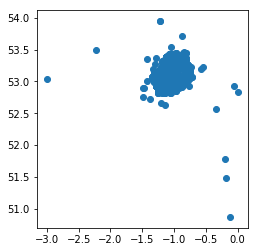

In [5]:
#We can crudely plot the points
gdf.plot();

Hmmm... it looks like there may be some outliers... We'll worry about those later....

## Heat Mapping Using folium

`folium` is a handy package for rendering interactive maps in Jupyter notebooks...

The `Heatmap` plugin expects data in the form [[Latitude, Longitude, count], ...]

In [6]:
data = gdf.groupby(['Latitude','Longitude']).size().reset_index().values.tolist()
data[:3]

[[50.867954, -0.123899, 1.0],
 [51.481702, -0.191066, 1.0],
 [51.784172, -0.204335, 1.0]]

In [7]:
import folium

In [8]:
import os
from folium.plugins import HeatMap

m = folium.Map([53., -1.3], zoom_start=9)


HeatMap(data).add_to(m)

m.save(os.path.join('.', 'Heatmap.html'))

m

We can also plot dual maps, with different crimes represented.

In [9]:
data_asb = gdf[gdf['Crime type']=='Anti-social behaviour'].groupby(['Latitude','Longitude']).size().reset_index().values.tolist()
data_cda = gdf[gdf['Crime type']=='Criminal damage and arson'].groupby(['Latitude','Longitude']).size().reset_index().values.tolist()



In [48]:
m = folium.plugins.DualMap(location=(52.99, -1.18), tiles='cartodbpositron', zoom_start=13)

fg_1 = folium.FeatureGroup(name='markers_1').add_to(m.m1)
fg_2 = folium.FeatureGroup(name='markers_2').add_to(m.m2)


HeatMap(data_asb).add_to(m.m1)
HeatMap(data_cda).add_to(m.m2)


legend_html = '''
         <div style="position: fixed;padding:10px; 
         bottom: 50px; right: 50px;z-index:9999;background:white">{}</div>'''

m.get_root().html.add_child(folium.Element(legend_html.format('<div style="position: fixed;padding:10px; bottom: 50px; left: 50px;z-index:9999;background:white">Anti-social behaviour</div>')))
m.m2.get_root().html.add_child(folium.Element(legend_html.format('<div style="position: fixed;padding:10px; bottom: 50px; right: 50px;z-index:9999;background:white">Criminal damage and arson</div>')))

m

## ipyleaflet

`ipyleaflet` offers a wider range of controls than `folium`.

For example, using the split map control, we could presumably create two heatmap layers relating to different crimes or choropleths of one indicator versus another and then slide between them to compare them.

In [3]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, SplitMapControl


m = Map(center=(42.6824, 365.581), zoom=5)

right_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2017-11-11")
left_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisAquaBands721CR, "2017-11-11")

control = SplitMapControl(left_layer=left_layer, right_layer=right_layer)
m.add_control(control)

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

`ipyleaflet` also supports callbacks from the map back to code running in the notebook.

This means we should be able to draw a shape, and then, using another embedded widget in the map, click a button to retrieve and plot crimes recorded within that area.

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

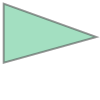

In [161]:
#via https://gis.stackexchange.com/a/312462/119781
from ipyleaflet import Map, basemaps, basemap_to_tiles, DrawControl, WidgetControl
from ipywidgets import Button

from shapely.geometry import shape

watercolor = basemap_to_tiles(basemaps.Stamen.Watercolor)
m = Map(layers=(watercolor, ), center=(50.9,-1), zoom=9)
draw_control = DrawControl()

draw_control.circle = {
    "shapeOptions": {
        "fillColor": "#efed69",
        "color": "#efed69",
        "fillOpacity": 1.0
    }
}

feature_collection = {
    'type': 'FeatureCollection',
    'features': []
}

def handle_draw(self, action, geo_json):
    """Do something with the GeoJSON when it's drawn on the map"""    
    feature_collection['features'].append(geo_json)

draw_control.on_draw(handle_draw)

m.add_control(draw_control)

button = Button(description="Shape co-ords")

def on_button_clicked(b):
    #Generate and preview the shape
    display(shape(feature_collection['features'][0]['geometry']))
    #print(feature_collection)

button.on_click(on_button_clicked)

widget_control = WidgetControl(widget=button, position='bottomright')
m.add_control(widget_control)
m

#Draw a shape on the map below... then press the button...

In [162]:
#The coordinates can then be accessed from code
feature_collection

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'style': {'stroke': True,
     'color': '#3388ff',
     'weight': 4,
     'opacity': 0.5,
     'fill': True,
     'fillColor': None,
     'fillOpacity': 0.2,
     'clickable': True}},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-1.179019, 50.751391],
      [-1.179019, 50.703674],
      [-1.104125, 50.724455],
      [-1.179019, 50.751391]]]}}]}

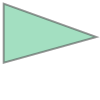

In [163]:
drawn_area = shape(feature_collection['features'][0]['geometry'])
drawn_area

In [164]:
#get crime in area
from police_api import PoliceAPI
api = PoliceAPI()

#Get the co-ords
lon, lat = drawn_area.exterior.coords.xy
drawn_boundary = list(zip(lat, lon))

#Preview
drawn_boundary[:3]

[(50.751391, -1.179019), (50.703674, -1.179019), (50.724455, -1.104125)]

In [165]:
import pandas as pd
import geopandas
from shapely.geometry import Point

def setCrimesAsGeoDataFrame(crimes, df=None):
    ''' Convert crimes result to dataframe. '''
    if df is None:
        df=pd.DataFrame(columns = ['cid','type', 'month','name','lid','location','lat','lon'])
        #[int, object, object, int, object, float, float]
    for c in crimes:
        df = df.append({'cid':c.id,'type':c.category.id, 'month':c.month, 'name':c.category.name,
                            'lat':c.location.latitude,'lon':c.location.longitude, 
                        'lid':c.location.id,'location':c.location.name }, ignore_index=True)

    df['lat']=df['lat'].astype(float)
    df['lon']=df['lon'].astype(float)
    
    df['Coordinates'] = list(zip(df['lon'], df['lat']))
    df['Coordinates'] = df['Coordinates'].apply(Point)
    
    return geopandas.GeoDataFrame(df, geometry='Coordinates')

crimes_df = setCrimesAsGeoDataFrame( api.get_crimes_area(drawn_boundary, date='2019-01') )
crimes_df.head()

,cid,type,month,name,lid,location,lat,lon,Coordinates
0,71249490,anti-social-behaviour,2019-01,Anti-social behaviour,763762,On or near Bedworth Place,50.726947,-1.163080,POINT (-1.16308 50.726947)
1,71249589,anti-social-behaviour,2019-01,Anti-social behaviour,763502,On or near Southfield Gardens,50.718526,-1.170072,POINT (-1.170072 50.718526)
2,71249583,anti-social-behaviour,2019-01,Anti-social behaviour,763545,On or near Slade Road,50.720485,-1.156055,POINT (-1.156055 50.720485)
3,71249519,anti-social-behaviour,2019-01,Anti-social behaviour,763803,On or near South View Close,50.725318,-1.162854,POINT (-1.162854 50.725318)
4,71249470,anti-social-behaviour,2019-01,Anti-social behaviour,763785,On or near George Street,50.728725,-1.161490,POINT (-1.16149 50.728725)


In [171]:
from ipyleaflet import Marker, MarkerCluster, GeoJSON
import geopandas


m = Map(center=(50.717355, -1), zoom=12)

m.add_layer(MarkerCluster(
    markers=[Marker(location=geolocation.coords[0][::-1]) for geolocation in crimes_df.geometry])
    )

data=drawn_area.__geo_interface__

geo_json = GeoJSON(data=data, style = {'color': 'green', 'opacity':1, 'weight':1.9, 'dashArray':'9', 'fillOpacity':0.8})
m.add_layer(geo_json)

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

We can now pull back the crimes within the area and record them inside the drawn area.

In [176]:
m = Map(layers=(watercolor, ), center=(50.7,-1.1), zoom=11)

draw_control.on_draw(handle_draw)

m.add_control(draw_control)

button2 = Button(description="Get crime data")

feature_collection = {
    'type': 'FeatureCollection',
    'features': []
}

def on_button_clicked2(b):
    ''' Get the crimes back within the location. '''
    crimes_df = setCrimesAsGeoDataFrame( api.get_crimes_area(drawn_boundary, date='2019-01') )
    m.add_layer(MarkerCluster(
        markers=[Marker(location=geolocation.coords[0][::-1]) for geolocation in crimes_df.geometry])
    )

button2.on_click(on_button_clicked2)

widget_control = WidgetControl(widget=button2, position='bottomright')
m.add_control(widget_control)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

## Plotting Boundaries

If we poke around the police data website, we also see an area that has boundaries...

https://data.police.uk/data/boundaries/

Let's have a rummage around inside them...

In [45]:
widget_control2 = WidgetControl(widget=button, position='bottomleft')
m.add_control(widget_control2)

### Force Boundaries

In [11]:
!wget https://data.police.uk/data/boundaries/force_kmls.zip

--2019-04-02 07:50:03--  https://data.police.uk/data/boundaries/force_kmls.zip
Resolving data.police.uk (data.police.uk)... 52.17.80.70, 52.208.73.184
Connecting to data.police.uk (data.police.uk)|52.17.80.70|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://policeuk-data.s3.amazonaws.com/kmls/force_kmls.zip [following]
--2019-04-02 07:50:03--  https://policeuk-data.s3.amazonaws.com/kmls/force_kmls.zip
Resolving policeuk-data.s3.amazonaws.com (policeuk-data.s3.amazonaws.com)... 52.218.85.9
Connecting to policeuk-data.s3.amazonaws.com (policeuk-data.s3.amazonaws.com)|52.218.85.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6093291 (5.8M) [application/zip]
Saving to: ‘force_kmls.zip.1’

force_kmls.zip.1    100%[===================>]   5.81M  --.-KB/s    in 0.1s    

2019-04-02 07:50:04 (44.4 MB/s) - ‘force_kmls.zip.1’ saved [6093291/6093291]



In [16]:
#Unzip the file...
!unzip force_kmls.zip

Archive:  force_kmls.zip
  inflating: force kmls/avon-and-somerset.kml  
  inflating: force kmls/bedfordshire.kml  
  inflating: force kmls/cambridgeshire.kml  
  inflating: force kmls/cheshire.kml  
  inflating: force kmls/city-of-london.kml  
  inflating: force kmls/cleveland.kml  
  inflating: force kmls/cumbria.kml  
  inflating: force kmls/derbyshire.kml  
  inflating: force kmls/devon-and-cornwall.kml  
  inflating: force kmls/dorset.kml   
  inflating: force kmls/durham.kml   
  inflating: force kmls/dyfed-powys.kml  
  inflating: force kmls/essex.kml    
  inflating: force kmls/gloucestershire.kml  
  inflating: force kmls/greater-manchester.kml  
  inflating: force kmls/gwent.kml    
  inflating: force kmls/hampshire.kml  
  inflating: force kmls/hertfordshire.kml  
  inflating: force kmls/humberside.kml  
  inflating: force kmls/kent.kml     
  inflating: force kmls/lancashire.kml  
  inflating: force kmls/leicestershire.kml  
  inflating: force kmls/lincolnshire.kml  
  infl

The forces boundaries file has boundaries for different police forces, in the form of `.kml` files. A `.kml` file is a *Keyhole Markup File*, a geogrpahical file type used widely in Google Maps and Google Earth.

The KML file format can include all sorts of monstrosities which means that, by default, geopandas support for reading it directly is disabled by default.

*(The most general workaround for working with KML is to use the `ogr2ogr` tool to convert the KML to a shapefile format, and then read that in to geopandas. We could also look elsewhere for better data managed [police authority shapefiles](http://geoportal.statistics.gov.uk/datasets/3e5a096a8c7c456fb6d3164a3f44b005_0).)*


However, the police boundaries KML is quite well-behaved so we *can* load it into a geopandas dataframe directly if we enable KML support.

In [12]:
import fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw'
fiona.drvsupport.supported_drivers['KML'] = 'rw'

Let's grab the file for Nottinghamshire and preview it.

In [13]:
gpd_notts = gpd.read_file('force kmls/nottinghamshire.kml')
gpd_notts.head()

,Name,Description,geometry
0,,,"(POLYGON Z ((-1.22519698716 53.1792449968 0, -..."


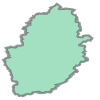

In [14]:
#get hold of the shapefile
notts_shp = gpd_notts['geometry'].iloc[0]
notts_shp

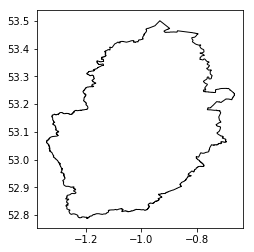

In [15]:
ax = gpd_notts.plot(color='white', edgecolor='black')

Let's see how the data fits into that.

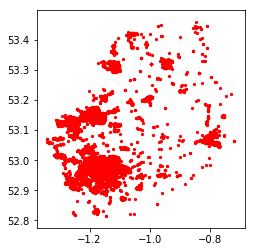

In [16]:
#This step may take some time to run as we check whether each point lies within the boundary
#We then filter the dataframe to retain only the points inside the boundary
gdf_notts = gdf[ gdf.intersects(gpd_notts['geometry'].iloc[0]) ]
gdf_notts.plot( marker='o', color='red', markersize=5);

With a little bit of jiggery pokery, we can overplot the crime locations on the boundary.

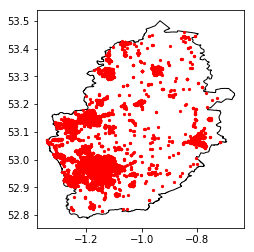

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax = gpd_notts.plot(color='white', edgecolor='black', ax=ax)
ax = gdf_notts.plot( marker='o', color='red', markersize=5, ax=ax)

### Neighbourhoods Data
The police data also has shapefiles for neighbourhoods. Let's try to grab that.

In [23]:
!wget https://data.police.uk/data/boundaries/2018-12.zip

--2019-04-01 16:09:25--  https://data.police.uk/data/boundaries/2018-12.zip
Resolving data.police.uk (data.police.uk)... 52.208.73.184, 52.17.80.70
Connecting to data.police.uk (data.police.uk)|52.208.73.184|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://policeuk-data.s3.amazonaws.com/kmls/2018-12.zip [following]
--2019-04-01 16:09:25--  https://policeuk-data.s3.amazonaws.com/kmls/2018-12.zip
Resolving policeuk-data.s3.amazonaws.com (policeuk-data.s3.amazonaws.com)... 52.218.24.25
Connecting to policeuk-data.s3.amazonaws.com (policeuk-data.s3.amazonaws.com)|52.218.24.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35113386 (33M) [application/zip]
Saving to: ‘2018-12.zip’

2018-12.zip         100%[===================>]  33.49M  83.0MB/s    in 0.4s    

2019-04-01 16:09:25 (83.0 MB/s) - ‘2018-12.zip’ saved [35113386/35113386]



In [24]:
!unzip 2018-12.zip

Archive:  2018-12.zip
   creating: 2018-12/city-of-london/
  inflating: 2018-12/city-of-london/cp.kml  
   creating: 2018-12/northern-ireland/
  inflating: 2018-12/northern-ireland/Strand Road.kml  
  inflating: 2018-12/northern-ireland/Downpatrick.kml  
  inflating: 2018-12/northern-ireland/Larne.kml  
  inflating: 2018-12/northern-ireland/Limavady.kml  
  inflating: 2018-12/northern-ireland/Lisburn Road.kml  
  inflating: 2018-12/northern-ireland/Woodbourne.kml  
  inflating: 2018-12/northern-ireland/Newtownards.kml  
  inflating: 2018-12/northern-ireland/Lisnaskea.kml  
  inflating: 2018-12/northern-ireland/Newry.kml  
  inflating: 2018-12/northern-ireland/Armagh.kml  
  inflating: 2018-12/northern-ireland/Magherafelt.kml  
  inflating: 2018-12/northern-ireland/Enniskillen.kml  
  inflating: 2018-12/northern-ireland/Newtownabbey.kml  
  inflating: 2018-12/northern-ireland/Antrim.kml  
  inflating: 2018-12/northern-ireland/Crossmaglen.kml  
  inflating: 2018-12/northern-ireland/Strab

  inflating: 2018-12/north-wales/WRW10.kml  
  inflating: 2018-12/north-wales/GSW02.kml  
  inflating: 2018-12/north-wales/WRW02.kml  
  inflating: 2018-12/north-wales/GSW12.kml  
  inflating: 2018-12/north-wales/YMW17.kml  
  inflating: 2018-12/north-wales/GSW10.kml  
  inflating: 2018-12/north-wales/YMW29.kml  
  inflating: 2018-12/north-wales/GNW13.kml  
  inflating: 2018-12/north-wales/YMW19.kml  
  inflating: 2018-12/north-wales/GNW23.kml  
  inflating: 2018-12/north-wales/FSW23.kml  
  inflating: 2018-12/north-wales/GNW16.kml  
  inflating: 2018-12/north-wales/DCW17.kml  
  inflating: 2018-12/north-wales/WRW12.kml  
  inflating: 2018-12/north-wales/DCW16.kml  
  inflating: 2018-12/north-wales/WCW21.kml  
  inflating: 2018-12/north-wales/WRW26.kml  
  inflating: 2018-12/north-wales/GSW11.kml  
  inflating: 2018-12/north-wales/GNW06.kml  
  inflating: 2018-12/north-wales/WCW13.kml  
  inflating: 2018-12/north-wales/WRW20.kml  
  inflating: 2018-12/north-wales/YMW31.kml  
  inflatin

  inflating: 2018-12/dyfed-powys/120.kml  
  inflating: 2018-12/dyfed-powys/111.kml  
  inflating: 2018-12/dyfed-powys/139.kml  
  inflating: 2018-12/dyfed-powys/107.kml  
  inflating: 2018-12/dyfed-powys/134.kml  
  inflating: 2018-12/dyfed-powys/102.kml  
  inflating: 2018-12/dyfed-powys/133.kml  
  inflating: 2018-12/dyfed-powys/123.kml  
  inflating: 2018-12/dyfed-powys/108.kml  
  inflating: 2018-12/dyfed-powys/140.kml  
  inflating: 2018-12/dyfed-powys/106.kml  
  inflating: 2018-12/dyfed-powys/121.kml  
  inflating: 2018-12/dyfed-powys/145.kml  
  inflating: 2018-12/dyfed-powys/143.kml  
  inflating: 2018-12/dyfed-powys/125.kml  
  inflating: 2018-12/dyfed-powys/101.kml  
  inflating: 2018-12/dyfed-powys/122.kml  
  inflating: 2018-12/dyfed-powys/110.kml  
  inflating: 2018-12/dyfed-powys/127.kml  
  inflating: 2018-12/dyfed-powys/119.kml  
  inflating: 2018-12/dyfed-powys/146.kml  
  inflating: 2018-12/dyfed-powys/135.kml  
  inflating: 2018-12/dyfed-powys/132.kml  
   creating

  inflating: 2018-12/northamptonshire/SCT112.kml  
  inflating: 2018-12/northamptonshire/SCT103.kml  
  inflating: 2018-12/northamptonshire/SCT132.kml  
  inflating: 2018-12/northamptonshire/SCT111.kml  
  inflating: 2018-12/northamptonshire/SCT141.kml  
  inflating: 2018-12/northamptonshire/SCT122.kml  
  inflating: 2018-12/northamptonshire/SCT131.kml  
  inflating: 2018-12/northamptonshire/SCT163.kml  
  inflating: 2018-12/northamptonshire/SCT102.kml  
  inflating: 2018-12/northamptonshire/SCT152.kml  
  inflating: 2018-12/northamptonshire/SCT142.kml  
  inflating: 2018-12/northamptonshire/SCT164.kml  
  inflating: 2018-12/northamptonshire/SCT101.kml  
   creating: 2018-12/gwent/
  inflating: 2018-12/gwent/TP87.kml  
  inflating: 2018-12/gwent/MC82.kml  
  inflating: 2018-12/gwent/MM83.kml  
  inflating: 2018-12/gwent/MM82.kml  
  inflating: 2018-12/gwent/GA83.kml  
  inflating: 2018-12/gwent/TP88.kml  
  inflating: 2018-12/gwent/CC85.kml  
  inflating: 2018-12/gwent/TC88.kml  
  inf

  inflating: 2018-12/metropolitan/00AS02T.kml  
  inflating: 2018-12/metropolitan/E05000295.kml  
  inflating: 2018-12/metropolitan/00BCFZ.kml  
  inflating: 2018-12/metropolitan/E05009330.kml  
  inflating: 2018-12/metropolitan/E05000516.kml  
  inflating: 2018-12/metropolitan/00AS04N.kml  
  inflating: 2018-12/metropolitan/E05000320.kml  
  inflating: 2018-12/metropolitan/00BC06N.kml  
  inflating: 2018-12/metropolitan/00AT02N.kml  
  inflating: 2018-12/metropolitan/00BCGH.kml  
  inflating: 2018-12/metropolitan/E05000174.kml  
  inflating: 2018-12/metropolitan/E05009399.kml  
  inflating: 2018-12/metropolitan/E05009370.kml  
  inflating: 2018-12/metropolitan/E05000597.kml  
  inflating: 2018-12/metropolitan/E05000313.kml  
  inflating: 2018-12/metropolitan/00ADGD.kml  
  inflating: 2018-12/metropolitan/E05000210.kml  
  inflating: 2018-12/metropolitan/E05000598.kml  
  inflating: 2018-12/metropolitan/E05000259.kml  
  inflating: 2018-12/metropolitan/E05000405.kml  
  inflating: 2018

  inflating: 2018-12/metropolitan/E05000642.kml  
  inflating: 2018-12/metropolitan/00AZ03N.kml  
  inflating: 2018-12/metropolitan/E05009319.kml  
  inflating: 2018-12/metropolitan/RPBU.kml  
  inflating: 2018-12/metropolitan/00BCGJ.kml  
  inflating: 2018-12/metropolitan/E05000271.kml  
  inflating: 2018-12/metropolitan/E05009394.kml  
  inflating: 2018-12/metropolitan/E05000138.kml  
  inflating: 2018-12/metropolitan/E05000092.kml  
  inflating: 2018-12/metropolitan/E05000454.kml  
  inflating: 2018-12/metropolitan/00AHGE.kml  
  inflating: 2018-12/metropolitan/E05000648.kml  
  inflating: 2018-12/metropolitan/E05000316.kml  
  inflating: 2018-12/metropolitan/E05000350.kml  
  inflating: 2018-12/metropolitan/E05000416.kml  
  inflating: 2018-12/metropolitan/E05000086.kml  
  inflating: 2018-12/metropolitan/00BEGR.kml  
  inflating: 2018-12/metropolitan/E05009395.kml  
  inflating: 2018-12/metropolitan/00BC01T.kml  
  inflating: 2018-12/metropolitan/E05000375.kml  
  inflating: 2018-

  inflating: 2018-12/metropolitan/00BEGE.kml  
  inflating: 2018-12/metropolitan/E05000061.kml  
  inflating: 2018-12/metropolitan/E05000272.kml  
  inflating: 2018-12/metropolitan/00AHGN.kml  
  inflating: 2018-12/metropolitan/E05000289.kml  
  inflating: 2018-12/metropolitan/E05000275.kml  
  inflating: 2018-12/metropolitan/E05000304.kml  
  inflating: 2018-12/metropolitan/SATST4.kml  
  inflating: 2018-12/metropolitan/E05000036.kml  
  inflating: 2018-12/metropolitan/E05000484.kml  
  inflating: 2018-12/metropolitan/E05000357.kml  
  inflating: 2018-12/metropolitan/00BEGH.kml  
  inflating: 2018-12/metropolitan/00BCGS.kml  
  inflating: 2018-12/metropolitan/E05000291.kml  
  inflating: 2018-12/metropolitan/E05009320.kml  
  inflating: 2018-12/metropolitan/E05000279.kml  
  inflating: 2018-12/metropolitan/E05000362.kml  
  inflating: 2018-12/metropolitan/E05000060.kml  
  inflating: 2018-12/metropolitan/E05000472.kml  
  inflating: 2018-12/metropolitan/E05000624.kml  
  inflating: 20

  inflating: 2018-12/south-yorkshire/KD.kml  
  inflating: 2018-12/south-yorkshire/CA.kml  
  inflating: 2018-12/south-yorkshire/CC.kml  
   creating: 2018-12/leicestershire/
  inflating: 2018-12/leicestershire/NC66.kml  
  inflating: 2018-12/leicestershire/NL60.kml  
  inflating: 2018-12/leicestershire/NH20.kml  
  inflating: 2018-12/leicestershire/NL56.kml  
  inflating: 2018-12/leicestershire/NH29.kml  
  inflating: 2018-12/leicestershire/NH22.kml  
  inflating: 2018-12/leicestershire/NS49.kml  
  inflating: 2018-12/leicestershire/NL58.kml  
  inflating: 2018-12/leicestershire/NH23.kml  
  inflating: 2018-12/leicestershire/NH26.kml  
  inflating: 2018-12/leicestershire/NH19.kml  
  inflating: 2018-12/leicestershire/NE14.kml  
  inflating: 2018-12/leicestershire/NS54.kml  
  inflating: 2018-12/leicestershire/NR35.kml  
  inflating: 2018-12/leicestershire/NL65.kml  
  inflating: 2018-12/leicestershire/NR36.kml  
  inflating: 2018-12/leicestershire/NW03.kml  
  inflating: 2018-12/leice

  inflating: 2018-12/devon-and-cornwall/DEV.4005.kml  
  inflating: 2018-12/devon-and-cornwall/PLY.4018.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4041.kml  
  inflating: 2018-12/devon-and-cornwall/PLY.4032.kml  
  inflating: 2018-12/devon-and-cornwall/PLY.4035.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4032.kml  
  inflating: 2018-12/devon-and-cornwall/CIOS.4053.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4103.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4054.kml  
  inflating: 2018-12/devon-and-cornwall/CIOS.4038.kml  
  inflating: 2018-12/devon-and-cornwall/CIOS.4059.kml  
  inflating: 2018-12/devon-and-cornwall/PLY.4028.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4033.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4031.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4004.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4063.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4055.kml  
  inflating: 2018-12/devon-and-cornwall/CIOS.4057.kml  
  infl

  inflating: 2018-12/lancashire/E6.kml  
  inflating: 2018-12/lancashire/A24.kml  
  inflating: 2018-12/lancashire/E28.kml  
  inflating: 2018-12/lancashire/A27.kml  
  inflating: 2018-12/lancashire/C19.kml  
  inflating: 2018-12/lancashire/F20.kml  
  inflating: 2018-12/lancashire/E16.kml  
  inflating: 2018-12/lancashire/D15.kml  
  inflating: 2018-12/lancashire/B15.kml  
  inflating: 2018-12/lancashire/E39.kml  
  inflating: 2018-12/lancashire/C16.kml  
  inflating: 2018-12/lancashire/B28.kml  
  inflating: 2018-12/lancashire/A21.kml  
  inflating: 2018-12/lancashire/F27.kml  
  inflating: 2018-12/lancashire/D4.kml  
  inflating: 2018-12/lancashire/A10.kml  
  inflating: 2018-12/lancashire/E8.kml  
  inflating: 2018-12/lancashire/F9.kml  
  inflating: 2018-12/lancashire/F7.kml  
  inflating: 2018-12/lancashire/F10.kml  
  inflating: 2018-12/lancashire/B43.kml  
  inflating: 2018-12/lancashire/A26.kml  
  inflating: 2018-12/lancashire/B29.kml  
  inflating: 2018-12/lancashire/F2.kml 

  inflating: 2018-12/west-mercia/PAG07.kml  
  inflating: 2018-12/west-mercia/PAF01.kml  
  inflating: 2018-12/west-mercia/PAF17.kml  
  inflating: 2018-12/west-mercia/PAF07.kml  
  inflating: 2018-12/west-mercia/PAF11.kml  
  inflating: 2018-12/west-mercia/PAD01.kml  
  inflating: 2018-12/west-mercia/PAE08.kml  
  inflating: 2018-12/west-mercia/PAF14.kml  
  inflating: 2018-12/west-mercia/PAF18.kml  
  inflating: 2018-12/west-mercia/PAG06.kml  
   creating: 2018-12/south-wales/
  inflating: 2018-12/south-wales/W05000586.kml  
  inflating: 2018-12/south-wales/W05000865.kml  
  inflating: 2018-12/south-wales/W05000711.kml  
  inflating: 2018-12/south-wales/W05000657.kml  
  inflating: 2018-12/south-wales/W05000619.kml  
  inflating: 2018-12/south-wales/W05000935.kml  
  inflating: 2018-12/south-wales/W05000966.kml  
  inflating: 2018-12/south-wales/W05000636.kml  
  inflating: 2018-12/south-wales/W05000553.kml  
  inflating: 2018-12/south-wales/W05000554.kml  
  inflating: 2018-12/south

  inflating: 2018-12/greater-manchester/GC21.kml  
  inflating: 2018-12/greater-manchester/KC45.kml  
  inflating: 2018-12/greater-manchester/LC03.kml  
  inflating: 2018-12/greater-manchester/EC04.kml  
  inflating: 2018-12/greater-manchester/GC17.kml  
  inflating: 2018-12/greater-manchester/MC19.kml  
  inflating: 2018-12/greater-manchester/PC15.kml  
  inflating: 2018-12/greater-manchester/AC33.kml  
  inflating: 2018-12/greater-manchester/FC06.kml  
  inflating: 2018-12/greater-manchester/KC43.kml  
  inflating: 2018-12/greater-manchester/JC27.kml  
  inflating: 2018-12/greater-manchester/PC03.kml  
  inflating: 2018-12/greater-manchester/FC10.kml  
  inflating: 2018-12/greater-manchester/NC09.kml  
  inflating: 2018-12/greater-manchester/JC12.kml  
  inflating: 2018-12/greater-manchester/JC28.kml  
  inflating: 2018-12/greater-manchester/FC04.kml  
  inflating: 2018-12/greater-manchester/LC07.kml  
  inflating: 2018-12/greater-manchester/LC14.kml  
  inflating: 2018-12/greater-ma

  inflating: 2018-12/hertfordshire/E01.kml  
  inflating: 2018-12/hertfordshire/G03.kml  
  inflating: 2018-12/hertfordshire/J02.kml  
  inflating: 2018-12/hertfordshire/E02.kml  
  inflating: 2018-12/hertfordshire/D04.kml  
  inflating: 2018-12/hertfordshire/B02.kml  
  inflating: 2018-12/hertfordshire/A02.kml  
  inflating: 2018-12/hertfordshire/G02.kml  
  inflating: 2018-12/hertfordshire/F01.kml  
  inflating: 2018-12/hertfordshire/A04.kml  
  inflating: 2018-12/hertfordshire/C06.kml  
  inflating: 2018-12/hertfordshire/D01.kml  
  inflating: 2018-12/hertfordshire/F03.kml  
  inflating: 2018-12/hertfordshire/E03.kml  
  inflating: 2018-12/hertfordshire/A03.kml  
  inflating: 2018-12/hertfordshire/C02.kml  
  inflating: 2018-12/hertfordshire/D02.kml  
  inflating: 2018-12/hertfordshire/J01.kml  
  inflating: 2018-12/hertfordshire/K02.kml  
  inflating: 2018-12/hertfordshire/F02.kml  
  inflating: 2018-12/hertfordshire/K03.kml  
  inflating: 2018-12/hertfordshire/B01.kml  
  inflatin

  inflating: 2018-12/surrey/WVHG.kml  
  inflating: 2018-12/surrey/EPCE.kml  
  inflating: 2018-12/surrey/WKMA.kml  
  inflating: 2018-12/surrey/SHFH.kml  
  inflating: 2018-12/surrey/EPNO.kml  
  inflating: 2018-12/surrey/RBTW.kml  
  inflating: 2018-12/surrey/RBRE.kml  
  inflating: 2018-12/surrey/GDMB.kml  
  inflating: 2018-12/surrey/TNCW.kml  
  inflating: 2018-12/surrey/RURT.kml  
  inflating: 2018-12/surrey/SHMD.kml  
  inflating: 2018-12/surrey/WVCE.kml  
  inflating: 2018-12/surrey/RUEG.kml  
  inflating: 2018-12/surrey/WKMH.kml  
  inflating: 2018-12/surrey/SPSH.kml  
  inflating: 2018-12/surrey/RUET.kml  
  inflating: 2018-12/surrey/WVSU.kml  
  inflating: 2018-12/surrey/ELWE.kml  
  inflating: 2018-12/surrey/GDSR.kml  
  inflating: 2018-12/surrey/RUAT.kml  
  inflating: 2018-12/surrey/WKGH.kml  
  inflating: 2018-12/surrey/SHOS.kml  
  inflating: 2018-12/surrey/TNOL.kml  
  inflating: 2018-12/surrey/GDPW.kml  
  inflating: 2018-12/surrey/RBSE.kml  
  inflating: 2018-12/surr

   creating: 2018-12/merseyside/
  inflating: 2018-12/merseyside/A1A2.kml  
  inflating: 2018-12/merseyside/B1.kml  
  inflating: 2018-12/merseyside/C1C2C3.kml  
  inflating: 2018-12/merseyside/E2E4.kml  
  inflating: 2018-12/merseyside/E1E3.kml  
  inflating: 2018-12/merseyside/D1D2D3.kml  
  inflating: 2018-12/merseyside/B3.kml  
  inflating: 2018-12/merseyside/E7E8E9.kml  
  inflating: 2018-12/merseyside/E5E6.kml  
  inflating: 2018-12/merseyside/A3A4.kml  
   creating: 2018-12/west-yorkshire/
  inflating: 2018-12/west-yorkshire/BDT_BW.kml  
  inflating: 2018-12/west-yorkshire/WDT_CNW.kml  
  inflating: 2018-12/west-yorkshire/BDT_BE.kml  
  inflating: 2018-12/west-yorkshire/LDT_S.kml  
  inflating: 2018-12/west-yorkshire/WDT_NER.kml  
  inflating: 2018-12/west-yorkshire/LDT_E.kml  
  inflating: 2018-12/west-yorkshire/LDT_NE.kml  
  inflating: 2018-12/west-yorkshire/CDT_HX.kml  
  inflating: 2018-12/west-yorkshire/BDT_CI.kml  
  inflating: 2018-12/west-yorkshire/LDT_NW.kml  
  inflat

  inflating: 2018-12/durham/12.kml   
  inflating: 2018-12/durham/151.kml  
  inflating: 2018-12/durham/39.kml   
  inflating: 2018-12/durham/45.kml   
  inflating: 2018-12/durham/95.kml   
  inflating: 2018-12/durham/94.kml   
  inflating: 2018-12/durham/141.kml  
  inflating: 2018-12/durham/42.kml   
  inflating: 2018-12/durham/19.kml   
  inflating: 2018-12/durham/96.kml   
  inflating: 2018-12/durham/69.kml   
  inflating: 2018-12/durham/159.kml  
  inflating: 2018-12/durham/30.kml   
  inflating: 2018-12/durham/76.kml   
  inflating: 2018-12/durham/6.kml    
  inflating: 2018-12/durham/64.kml   
  inflating: 2018-12/durham/29.kml   
  inflating: 2018-12/durham/102.kml  
  inflating: 2018-12/durham/16.kml   
  inflating: 2018-12/durham/162.kml  
  inflating: 2018-12/durham/36.kml   
  inflating: 2018-12/durham/68.kml   
  inflating: 2018-12/durham/93.kml   
  inflating: 2018-12/durham/133.kml  
  inflating: 2018-12/durham/123.kml  
  inflating: 2018-12/durham/26.kml   
  inflating:

  inflating: 2018-12/sussex/WC3NH23.kml  
  inflating: 2018-12/sussex/WC2NH19.kml  
  inflating: 2018-12/sussex/WM1NH3.kml  
  inflating: 2018-12/sussex/ES1NH4.kml  
  inflating: 2018-12/sussex/CC2NH22.kml  
  inflating: 2018-12/sussex/ER1NH7.kml  
  inflating: 2018-12/sussex/EE2NH6.kml  
  inflating: 2018-12/sussex/WH2NH11.kml  
  inflating: 2018-12/sussex/EW1NH11.kml  
  inflating: 2018-12/sussex/EH2NH11.kml  
  inflating: 2018-12/sussex/EH1NH6.kml  
  inflating: 2018-12/sussex/ES1NH1.kml  
  inflating: 2018-12/sussex/ES1NH2.kml  
  inflating: 2018-12/sussex/WH2NH10.kml  
  inflating: 2018-12/sussex/EE2NH2.kml  
  inflating: 2018-12/sussex/EE3NH20.kml  
  inflating: 2018-12/sussex/CE2NH2.kml  
  inflating: 2018-12/sussex/WM2NH4.kml  
  inflating: 2018-12/sussex/CW2NH1.kml  
  inflating: 2018-12/sussex/CC1NH3.kml  
  inflating: 2018-12/sussex/ES1NH22.kml  
  inflating: 2018-12/sussex/EW2NH44.kml  
  inflating: 2018-12/sussex/WM2NH5.kml  
  inflating: 2018-12/sussex/ER3NH39.kml  
  inf

  inflating: 2018-12/lincolnshire/NC18.kml  
  inflating: 2018-12/lincolnshire/NC21.kml  
  inflating: 2018-12/lincolnshire/NC16.kml  
  inflating: 2018-12/lincolnshire/NC53.kml  
  inflating: 2018-12/lincolnshire/NC58.kml  
  inflating: 2018-12/lincolnshire/NC27.kml  
  inflating: 2018-12/lincolnshire/NC56.kml  
  inflating: 2018-12/lincolnshire/NC32.kml  
  inflating: 2018-12/lincolnshire/NC09.kml  
  inflating: 2018-12/lincolnshire/NC42.kml  
  inflating: 2018-12/lincolnshire/NC52.kml  
  inflating: 2018-12/lincolnshire/NC57.kml  
  inflating: 2018-12/lincolnshire/NC39.kml  
  inflating: 2018-12/lincolnshire/NC38.kml  
  inflating: 2018-12/lincolnshire/NC36.kml  
  inflating: 2018-12/lincolnshire/NC37.kml  
  inflating: 2018-12/lincolnshire/NC26.kml  
  inflating: 2018-12/lincolnshire/NC55.kml  
  inflating: 2018-12/lincolnshire/NC31.kml  
  inflating: 2018-12/lincolnshire/NC51.kml  
  inflating: 2018-12/lincolnshire/NC54.kml  
  inflating: 2018-12/lincolnshire/NC02.kml  
  inflatin

  inflating: 2018-12/avon-and-somerset/BE163.kml  
  inflating: 2018-12/avon-and-somerset/BS107.kml  
  inflating: 2018-12/avon-and-somerset/AW039.kml  
  inflating: 2018-12/avon-and-somerset/CN205.kml  
  inflating: 2018-12/avon-and-somerset/BN195.kml  
  inflating: 2018-12/avon-and-somerset/BE182.kml  
  inflating: 2018-12/avon-and-somerset/CS222.kml  
  inflating: 2018-12/avon-and-somerset/AE028.kml  
  inflating: 2018-12/avon-and-somerset/CS221.kml  
  inflating: 2018-12/avon-and-somerset/AN012.kml  
  inflating: 2018-12/avon-and-somerset/AW040.kml  
  inflating: 2018-12/avon-and-somerset/AW049.kml  
  inflating: 2018-12/avon-and-somerset/BE194.kml  
  inflating: 2018-12/avon-and-somerset/AN002.kml  
  inflating: 2018-12/avon-and-somerset/BN175.kml  
  inflating: 2018-12/avon-and-somerset/AW044.kml  
  inflating: 2018-12/avon-and-somerset/AW038.kml  
  inflating: 2018-12/avon-and-somerset/CN213.kml  
  inflating: 2018-12/avon-and-somerset/AW052.kml  
  inflating: 2018-12/avon-and-s

This opens to quite a lot of KML files...

Let's have a look at one of them...

In [25]:
!ls 2018-12/nottinghamshire/

31-10.kml  31-19.kml  31-27.kml  31-35.kml  31-43.kml  31-51.kml  31-7.kml
31-11.kml  31-1.kml   31-28.kml  31-36.kml  31-44.kml  31-52.kml  31-8.kml
31-12.kml  31-20.kml  31-29.kml  31-37.kml  31-45.kml  31-53.kml  31-9.kml
31-13.kml  31-21.kml  31-2.kml	 31-38.kml  31-46.kml  31-54.kml
31-14.kml  31-22.kml  31-30.kml  31-39.kml  31-47.kml  31-55.kml
31-15.kml  31-23.kml  31-31.kml  31-3.kml   31-48.kml  31-56.kml
31-16.kml  31-24.kml  31-32.kml  31-40.kml  31-49.kml  31-57.kml
31-17.kml  31-25.kml  31-33.kml  31-41.kml  31-4.kml   31-5.kml
31-18.kml  31-26.kml  31-34.kml  31-42.kml  31-50.kml  31-6.kml


In [18]:
test_neighbourhood = gpd.read_file('2018-12/nottinghamshire/31-10.kml')
test_neighbourhood

,Name,Description,geometry
0,,,"POLYGON Z ((-0.997462 53.395232 0, -1.010676 5..."


This is a bit rubbish, and we can find more descriptibe boundary files elsewhere (eg http://geoportal.statistics.gov.uk/datasets/da831f80764346889837c72508f046fa_0 ) but let's stick with it for now.

We can automate reading all the files into a single, merged geodataframe:

In [19]:
import os

#Preview the first few items in a list of all the nottinghamshire files
os.listdir('2018-12/nottinghamshire/')[:3]

['31-44.kml', '31-53.kml', '31-57.kml']

In [20]:
#Automate the loading of the data into a single dataframe
#https://gis.stackexchange.com/a/162661/119781

notts_neighbourhoods = gpd.GeoDataFrame()
for f in os.listdir('2018-12/nottinghamshire/'):
    neighbourhood = gpd.read_file('2018-12/nottinghamshire/{}'.format(f))
    notts_neighbourhoods =  gpd.GeoDataFrame( pd.concat( [notts_neighbourhoods, neighbourhood], ignore_index=True) )

notts_neighbourhoods.head()

,Name,Description,geometry
0,,,"POLYGON Z ((-1.18308572625 52.9667621961 0, -1..."
1,,,"POLYGON Z ((-1.11886702936 52.9590839028 0, -1..."
2,,,"POLYGON Z ((-1.192462 52.955084 0, -1.192807 5..."
3,,,"POLYGON Z ((-1.23241680097 52.9420304138 0, -1..."
4,,,"POLYGON Z ((-1.192137 52.955847 0, -1.192142 5..."


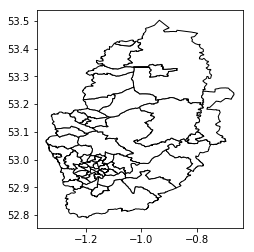

In [21]:
notts_neighbourhoods.plot(color='white', edgecolor='black');

Let's pick one neighbourhood:

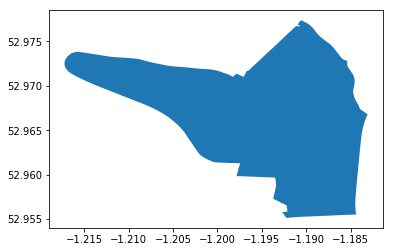

In [22]:
area0 = notts_neighbourhoods.iloc[:1]
area0.plot();

In [23]:
#Get the crimes within that area
gdf_area0 = gdf[ gdf.intersects(area0['geometry'].iloc[0]) ]

And look at the crimes within it:

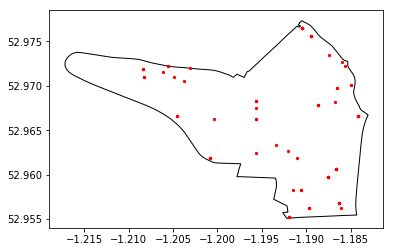

In [24]:
#Sketch of crimes within boundary
fig, ax = plt.subplots()

ax = area0.plot(color='white', edgecolor='black', ax=ax)
ax = gdf_area0.plot( marker='o', color='red', markersize=5, ax=ax);


## Retrieving Geospatial Data Within A Boundary from OpenStreetmap

The boundary file is quite a useful object because we can also use it to run bounded queries on *other* geographical datasets. For example, we can use the `osmnx` package to pull back road data within the area into the map.

In [25]:
import osmnx as ox

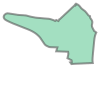

In [26]:
shp = area0['geometry'].iloc[0]
shp

In [27]:
#Get road data within boundary
#network types: {‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’}
area0_roads = ox.graph_from_polygon(shp, network_type='drive', truncate_by_edge=True,
                                    clean_periphery=False, simplify=True)

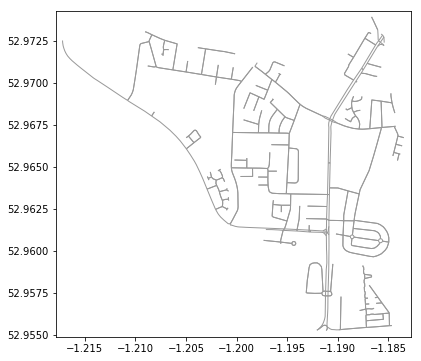

In [28]:
#plot roads
fig, ax = ox.plot_graph(area0_roads, node_size=0, axis_off=False);

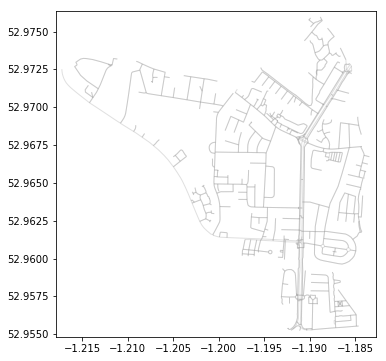

In [29]:
area0_inclprivateroads = ox.graph_from_polygon(shp, network_type='all_private', truncate_by_edge=True,
                                               clean_periphery=False, simplify=True)
fig_p, ax_p = ox.plot_graph(area0_inclprivateroads, node_size=0, axis_off=False, edge_alpha=0.3);

In [30]:
#Get building outlines in area
#May take some time to load... This would be better at eg output areas or LSOA level
footprints = ox.footprints_from_polygon(shp)

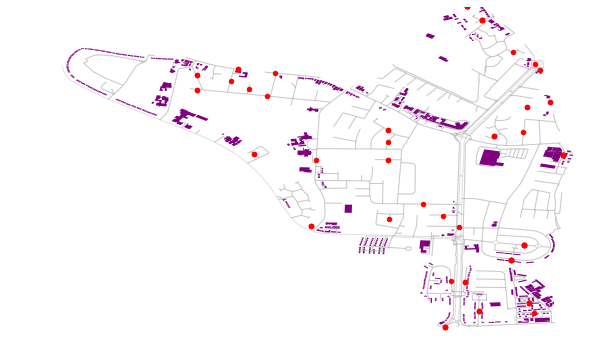

<Figure size 432x288 with 0 Axes>

In [31]:
#Plot houses over roads, including private roads
#It would be useful to be able to change the layer order
#It would also be nice to just be able to get the private roads to explore new (private) developments
fig_p1, ax_p1 = ox.plot_footprints(footprints,  fig=fig_p, ax=ax_p, color='purple', set_bounds=False,
                                 show=False, close=True,)
gdf_area0.plot( marker='o', color='red', markersize=20, ax=ax_p1, zorder=4);
fig_p1
#The projection of this, or at least the x/y scaling, is different to the previous map of just the roads?

We can use `osmnx` to plot a figure-ground image centered on the centre of the supplied graph and with a distance (in meters) around that.

It would be neater to actually tie this in to ta specific geography, eg output areas or lower super-output areas?

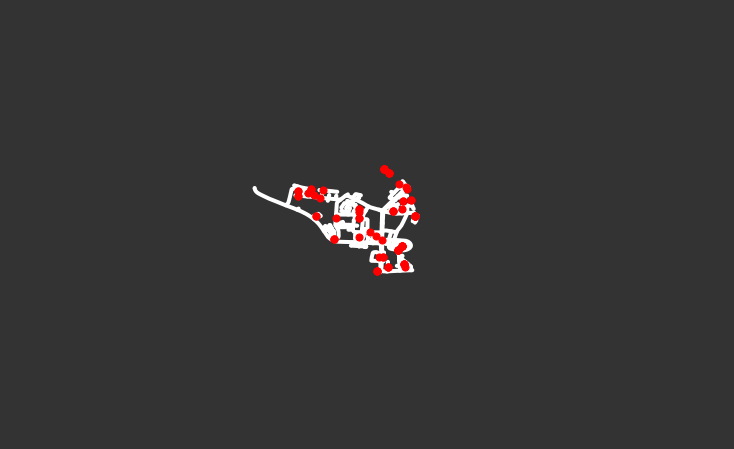

<Figure size 432x288 with 0 Axes>

In [32]:
fig1, ax1 = ox.plot_figure_ground(area0_roads,dist=5000)
gdf_area0.plot( marker='o', color='red', markersize=50, ax=ax1, zorder=4);
fig1

#It might also be interesting to try to identify 'rural' crimes on walk rather than drive routes?
#It would also be useful to be able to differentially colour private roads?

In [33]:
#Heavy interactive plots with folium are broken in Chrome at least
# eg https://github.com/python-visualization/folium/issues/812

#m = ox.plot_graph_folium(area0_roads, popup_attribute='name', edge_width=2, tiles='openstreetmap')
#m

## Interactive Maps With `folium`

Let's see how to plot some interactive maps, annotated with crime data markers, using the `folium` packge.

In [34]:
import folium

The `folium` package likes to know what projection the data is provided in order to render geometrical items correctly.

In [35]:
area0.crs = {'init' :'epsg:4326'}
gdf_area0.crs = {'init' :'epsg:4326'}

In [36]:
m=folium.Map(min_zoom=10, location=[52.9, -0.8])
folium.GeoJson(area0, name='geojson').add_to(m)

#The following is borked?
#m = ox.plot_graph_folium(area0_roads, graph_map=m, popup_attribute='name', edge_width=2, tiles='openstreetmap')
#Not sure if there's also a way of plotting footprints onto folium map to check registration
#eg ox.footprints_from_polygon(polygon);
m

In [37]:
for i in range(0,len(gdf_area0)):
    loc = gdf_area0.iloc[i]
    folium.Circle([loc['Latitude'], loc['Longitude']],
                  radius=1, color='red',
                  popup='{}<br/><br/>{}<br/><br/>{}'.format(loc['Crime type'],
                                                            loc['Location'],
                                                            loc['Last outcome category'])).add_to(m)
m

Alternatively, we can use a cluster marker.

Let's also see if we can characterise differnt crimes using different marker icons.

In [38]:
gdf_area0['Crime type'].unique()

array(['Anti-social behaviour', 'Other theft', 'Vehicle crime',
       'Bicycle theft', 'Burglary', 'Criminal damage and arson',
       'Public order', 'Violence and sexual offences', 'Other crime',
       'Shoplifting', 'Theft from the person'], dtype=object)

In [39]:
gdf_area0['Last outcome category'].unique()

array([nan, 'Investigation complete; no suspect identified',
       'Under investigation', 'Unable to prosecute suspect',
       'Formal action is not in the public interest'], dtype=object)

In [40]:
from folium.plugins import MarkerCluster

m=folium.Map(min_zoom=10, location=[52.9, -0.8])

marker_cluster = MarkerCluster().add_to(m)


icon_color_map={'Under investigation':'blue',
                'Unable to prosecute suspect':'purple',
                'Investigation complete; no suspect identified':'black',
                'Awaiting court outcome':'orange',
                'Further investigation is not in the public interest':'darkblue'
            }

icon_map={'Violence and sexual offences':('wrench','glyphicon'),
          'Public order':('beer', 'fa'),
          'Criminal damage and arson':('fire','fa'),
          'Other theft':('refresh','glyphicon'),
          'Burglary':('home','fa'),
          'Anti-social behaviour':('bullhorn','fa'),
          'Robbery':('usd','glyphicon'),
          'Possession of weapons':('fighter-jet','fa'),
          'Vehicle crime':('car','fa'),
          'Other crime':('question-sign','glyphicon'),
          'Drugs':('pushpin', 'glyphicon'),
          'Theft from the person':('user', 'glyphicon'),
          'Shoplifting':('shopping-cart','glyphicon')
}

for i in range(0,len(gdf_area0)):
    loc = gdf_area0.iloc[i]

    #For more on icons: help(folium.Icon)
    #It might make sense to choose a mapping from crime type to icon?
    #https://fontawesome.com/icons?d=gallery
    if loc['Crime type'] in icon_map:
        icon, prefix = icon_map[loc['Crime type']]
    else:
        icon,prefix='record','glyphicon'
    if loc['Last outcome category'] and loc['Last outcome category'] in icon_color_map:
        color=icon_color_map[loc['Last outcome category']]
    else:
        color='grey'
    icon = folium.Icon(icon=icon, icon_color='white', color=color, prefix=prefix)
    folium.Marker([loc['Latitude'], loc['Longitude']],
                  icon=icon,
                  popup='{}<br/><br/>{}<br/><br/>{}'.format(loc['Crime type'],
                                                            loc['Location'],
                                                            loc['Last outcome category'])).add_to(marker_cluster)

m

## Utilities and Fragments

Some useful fragments...

In [49]:
#Swapping lat long in dataframe
#https://github.com/python-visualization/folium/issues/1082#issuecomment-470547839
gdf['Coordinates'] = gdf['Coordinates'].apply(lambda x: Point(x.y, x.x))

In [ ]:
#Swap lat long and simplify POLY Z to POLY at same time
#comment to https://gis.stackexchange.com/a/258370/119781
import shapely
gdf.geometry = gdf.geometry.map(lambda poly: shapely.ops.transform(lambda x, y, z: (x, y), poly))